In [1]:
import os

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

import intmcp.plot as plot_lib
import intmcp.plot._parts as parts

# Change this to plot different problem
problem_name = "pe"

# Change dir name to use different base dir
exp_results_dir = 'pe'

df, results_dir = plot_lib.load_results(problem_name, exp_results_dir, iros=True)

print(plot_lib.results_summary(df, include_headers=False))

agent_i = 1
agent_j = 0

Num Exps = 103
Agent IDs = [0 1]
Num Sims = [  16  128  512 1024 2048 4096]
Nesting levels = [0 1 2 3]
Step Limits = [40]
Policy Classes = ['NestedSearchTree' 'PESPPolicy' 'RandomPolicy']
Rollout Policies = ['None'
 "{0: (<class 'posgmcp.envs.pe.policies.PESPPolicy'>, {'r_hi': 90, 'r_lo': -138}), 1: (<class 'posgmcp.policy.random_policy.RandomPolicy'>, {})}"]


In [2]:
# Want to remove all rows in df where agent j == PESPPolicy
random_j_df = df[(df[parts.POLICY_KEY] == 'PESPPolicy') & (df[parts.AGENT_ID_KEY] == agent_j)]
exp_ids = random_j_df[parts.EXP_ID_KEY].unique()
df = df[~df.exp_id.isin(exp_ids)]
print(df[parts.POLICY_KEY].unique())

['NestedSearchTree' 'RandomPolicy' 'PESPPolicy']


/home/jonathon/Code/i-ntmcp/intmcp/plot/_plot_pairwise_pis_y_by_x.py:202: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(lines, **legend_kwargs)


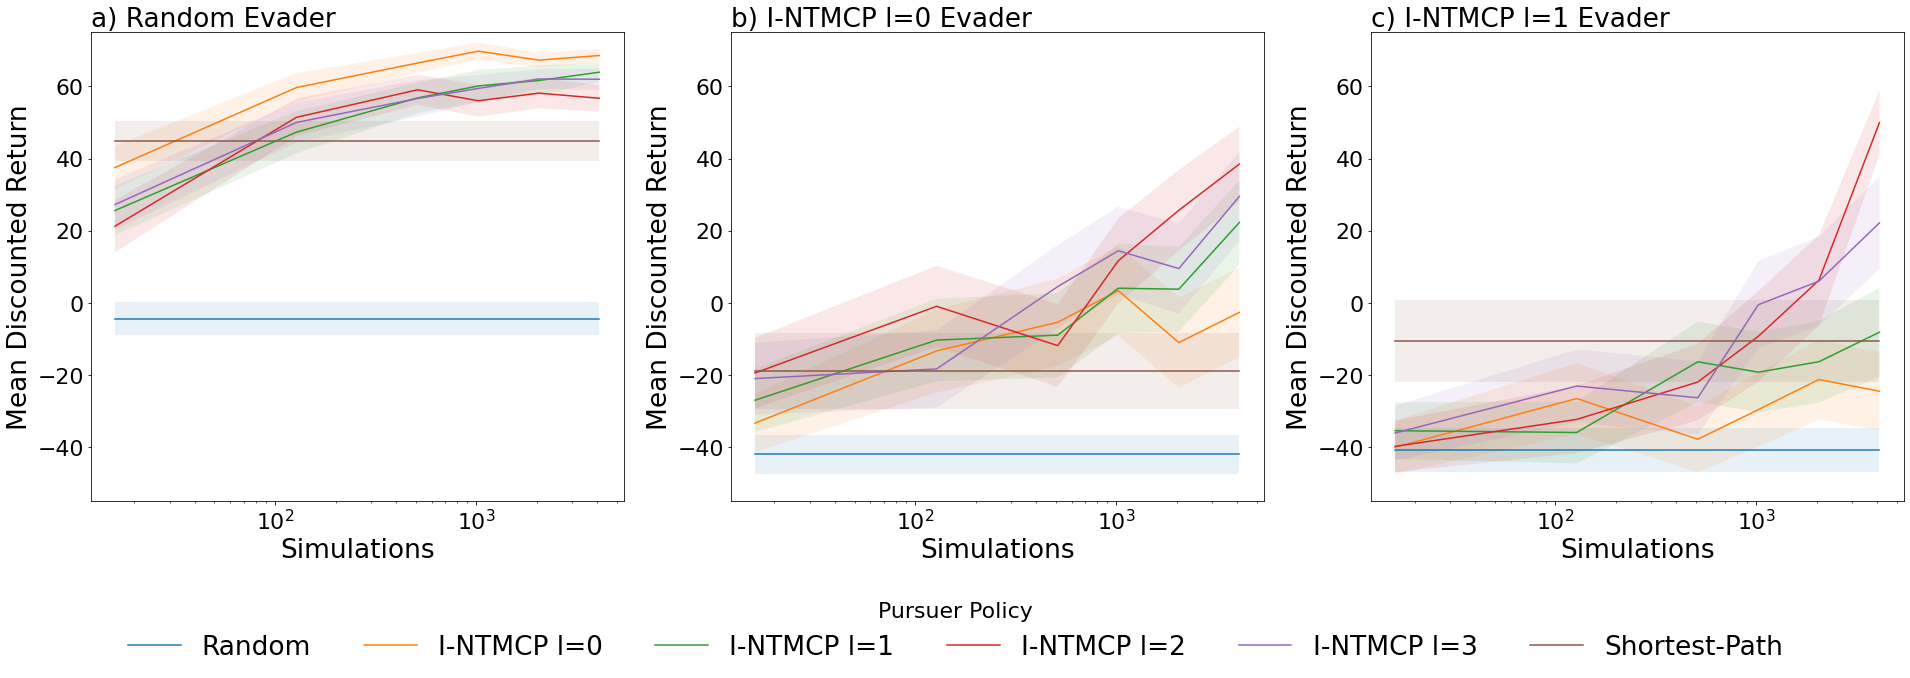

In [3]:
plot_lib.plot_pairwise_pis_y_by_x(
    df, 
    x_key="num_sims",
    y_key="episode_discounted_returns_mean", 
    y_err_key="episode_discounted_returns_CI",
    agent_i_id=agent_i,
    agent_j_id=agent_j,
    results_dir=results_dir,
    **{
        "ylabel": "Mean Discounted Return",
        "xlabel": "Simulations",
        "sharex": False,
        "sharey": False,
        "fontsize": 'large',
        "ylim": (-55, 75),
        "logx": True,
        "logy": False,
        "axes_titles": ["a) Random Evader", "b) I-NTMCP l=0 Evader", "c) I-NTMCP l=1 Evader"],
        "axes_title_kwargs": {
            "fontsize": 'large',
            "loc": "left"
        },
        "legend_kwargs": {
            "labels": ["Random", "I-NTMCP l=0", "I-NTMCP l=1", "I-NTMCP l=2", "I-NTMCP l=3", "Shortest-Path"],
            'title': 'Pursuer Policy',
            'fontsize': 'large',
            "bbox_to_anchor": [0.5, 0.0],
            "loc": 'center',
            "ncol": 6,
            "frameon": False
        }
    }
)

/home/jonathon/Code/i-ntmcp/intmcp/plot/_plot_pairwise_pis_y_by_x.py:202: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(lines, **legend_kwargs)


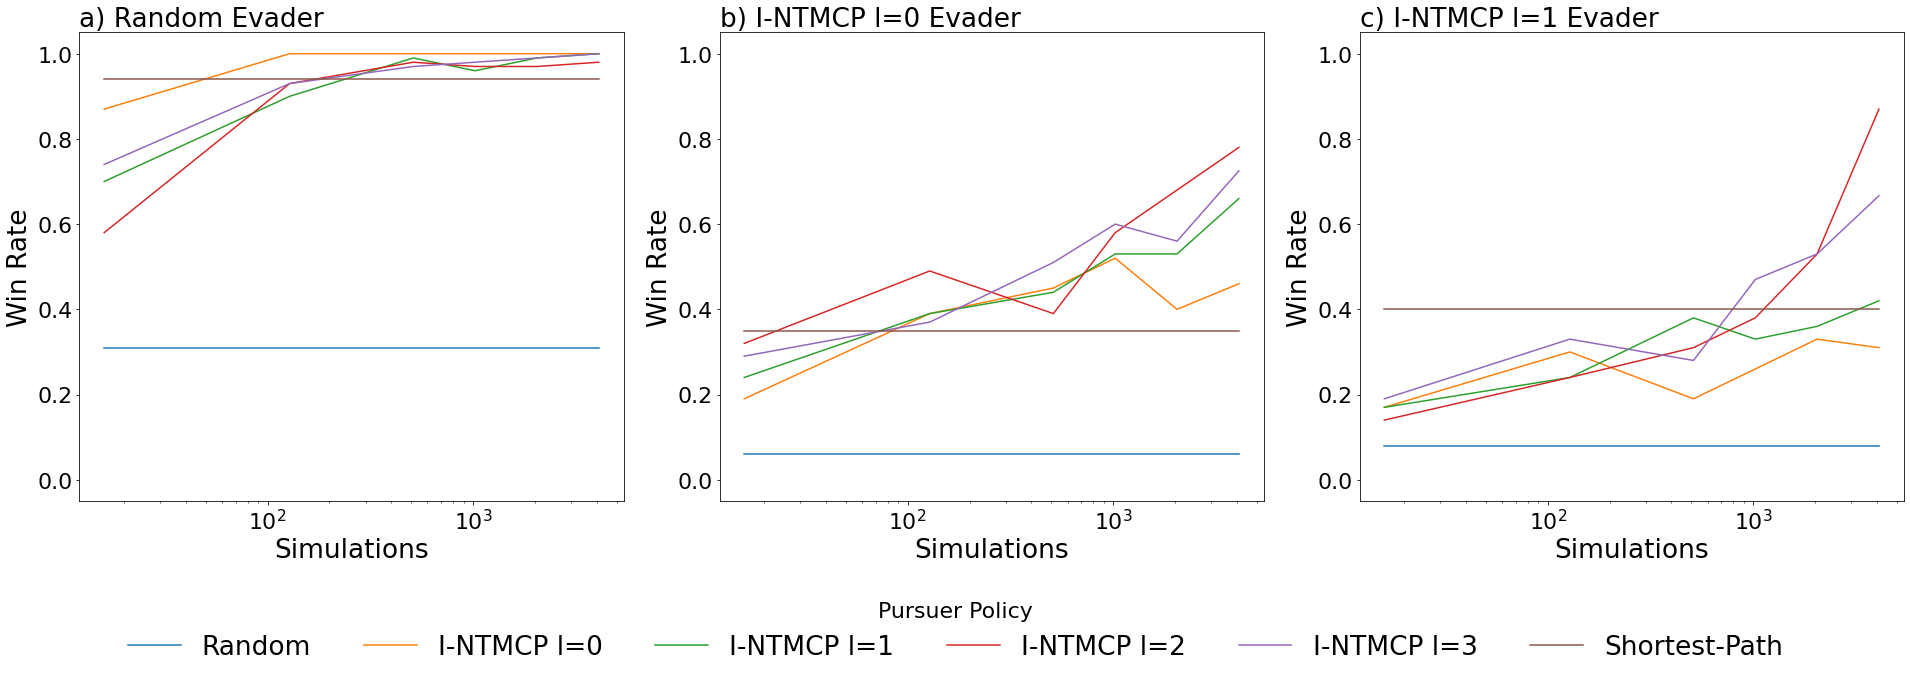

In [4]:
plot_lib.plot_pairwise_pis_y_by_x(
    df, 
    x_key="num_sims",
    y_key="proportion_num_outcome_WIN",  
    y_err_key=None,
    agent_i_id=agent_i,
    agent_j_id=agent_j,
    results_dir=results_dir,
    **{
        "ylabel": "Win Rate",
        "xlabel": "Simulations",
        "sharex": False,
        "sharey": False,
        "fontsize": 'large',
        "ylim": (-0.05, 1.05),
        "logx": True,
        "logy": False,
        "axes_titles": ["a) Random Evader", "b) I-NTMCP l=0 Evader", "c) I-NTMCP l=1 Evader"],
        "axes_title_kwargs": {
            "fontsize": 'large',
            "loc": "left"
        },
        "legend_kwargs": {
            "labels": ["Random", "I-NTMCP l=0", "I-NTMCP l=1", "I-NTMCP l=2", "I-NTMCP l=3", "Shortest-Path"],
            'title': 'Pursuer Policy',
            'fontsize': 'large',
            "bbox_to_anchor": [0.5, 0.0],
            "loc": 'center',
            "ncol": 6,
            "frameon": False
        }
    }
)